In [1]:
pip install Hydrograph-py

Note: you may need to restart the kernel to use updated packages.


In [2]:
from Hydrograph.hydrograph import sepBaseflow, maxFlowVolStats
from Hydrograph.extreme_analysis import *
import numpy as np
import pandas as pd

In [3]:
k= 0.000546  #Slope of the dividing line; i.e. slope that defines when peakflow event starts and baseflow separation occurs
             #Default is 0.000546  m^3 s^-1 km^-2 h^-1 (Hewlett and Hibbert 1967)
Area= 2414   # in km^2

In [4]:
dataframe=pd.read_csv('K:/Hydrograph/Daily River Authority trends for Manendragarh from 01-Apr-2021 to 01-Dec-2021.csv',parse_dates=[0], index_col=0, dayfirst=True)

In [5]:
dataframe

,Total runoff [m^3 s^-1]
Date,
2021-04-03,0.000000
2021-04-05,0.000000
2021-04-06,0.000000
2021-04-07,0.000000
2021-04-08,0.000000
...,...
2021-11-27,0.890229
2021-11-28,0.767807
2021-11-29,0.873977


In [6]:
dataframe.interpolate()

,Total runoff [m^3 s^-1]
Date,
2021-04-03,0.000000
2021-04-05,0.000000
2021-04-06,0.000000
2021-04-07,0.000000
2021-04-08,0.000000
...,...
2021-11-27,0.890229
2021-11-28,0.767807
2021-11-29,0.873977


In [7]:
df=sepBaseflow(dataframe, 60, Area, k, dt_max=24, tp_min=6)

Processing using a 60-minute interval...
2021-04-03 00:00:00
2021-04-03 01:00:00
2021-04-03 02:00:00
2021-04-03 03:00:00
2021-04-03 04:00:00
2021-04-03 05:00:00
2021-04-03 06:00:00
2021-04-03 07:00:00
2021-04-03 08:00:00
2021-04-03 09:00:00
2021-04-03 10:00:00
2021-04-03 11:00:00
2021-04-03 12:00:00
2021-04-03 13:00:00
2021-04-03 14:00:00
2021-04-03 15:00:00
2021-04-03 16:00:00
2021-04-03 17:00:00
2021-04-03 18:00:00
2021-04-03 19:00:00
2021-04-03 20:00:00
2021-04-03 21:00:00
2021-04-03 22:00:00
2021-04-03 23:00:00
2021-04-04 00:00:00
2021-04-04 01:00:00
2021-04-04 02:00:00
2021-04-04 03:00:00
2021-04-04 04:00:00
2021-04-04 05:00:00
2021-04-04 06:00:00
2021-04-04 07:00:00
2021-04-04 08:00:00
2021-04-04 09:00:00
2021-04-04 10:00:00
2021-04-04 11:00:00
2021-04-04 12:00:00
2021-04-04 13:00:00
2021-04-04 14:00:00
2021-04-04 15:00:00
2021-04-04 16:00:00
2021-04-04 17:00:00
2021-04-04 18:00:00
2021-04-04 19:00:00
2021-04-04 20:00:00
2021-04-04 21:00:00
2021-04-04 22:00:00
2021-04-04 23:00:00

In [8]:
df

,dt [hour],Total runoff [m^3 s^-1],Total runoff interp. [m^3 s^-1],Baseflow [m^3 s^-1],Peakflow [m^3 s^-1],Peak nr.,Peakflow starts,Peakflow ends,Flow volume [m^3],Max. flow [m^3 s^-1],Date max. flow,Tp [hour]
Date,,,,,,,,,,,,
2021-04-03 00:00:00,0.0,0.000000,0.000000,0.000000,0.0,NaN,NaT,NaT,NaN,NaN,NaT,NaN
2021-04-03 01:00:00,1.0,NaN,0.000000,0.000000,0.0,NaN,NaT,NaT,NaN,NaN,NaT,NaN
2021-04-03 02:00:00,1.0,NaN,0.000000,0.000000,0.0,NaN,NaT,NaT,NaN,NaN,NaT,NaN
2021-04-03 03:00:00,1.0,NaN,0.000000,0.000000,0.0,NaN,NaT,NaT,NaN,NaN,NaT,NaN
2021-04-03 04:00:00,1.0,NaN,0.000000,0.000000,0.0,NaN,NaT,NaT,NaN,NaN,NaT,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-11-30 20:00:00,1.0,NaN,0.717020,0.717020,0.0,NaN,NaT,NaT,NaN,NaN,NaT,NaN
2021-11-30 21:00:00,1.0,NaN,0.709854,0.709854,0.0,NaN,NaT,NaT,NaN,NaN,NaT,NaN
2021-11-30 22:00:00,1.0,NaN,0.702688,0.702688,0.0,NaN,NaT,NaT,NaN,NaN,NaT,NaN


In [9]:
df.interpolate()

,dt [hour],Total runoff [m^3 s^-1],Total runoff interp. [m^3 s^-1],Baseflow [m^3 s^-1],Peakflow [m^3 s^-1],Peak nr.,Peakflow starts,Peakflow ends,Flow volume [m^3],Max. flow [m^3 s^-1],Date max. flow,Tp [hour]
Date,,,,,,,,,,,,
2021-04-03 00:00:00,0.0,0.000000,0.000000,0.000000,0.0,NaN,NaT,NaT,NaN,NaN,NaT,NaN
2021-04-03 01:00:00,1.0,0.000000,0.000000,0.000000,0.0,NaN,NaT,NaT,NaN,NaN,NaT,NaN
2021-04-03 02:00:00,1.0,0.000000,0.000000,0.000000,0.0,NaN,NaT,NaT,NaN,NaN,NaT,NaN
2021-04-03 03:00:00,1.0,0.000000,0.000000,0.000000,0.0,NaN,NaT,NaT,NaN,NaN,NaT,NaN
2021-04-03 04:00:00,1.0,0.000000,0.000000,0.000000,0.0,NaN,NaT,NaT,NaN,NaN,NaT,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-11-30 20:00:00,1.0,0.717020,0.717020,0.717020,0.0,-7.0,NaT,NaT,212577.79428,69.1799,NaT,23.0
2021-11-30 21:00:00,1.0,0.709854,0.709854,0.709854,0.0,-7.0,NaT,NaT,212577.79428,69.1799,NaT,23.0
2021-11-30 22:00:00,1.0,0.702688,0.702688,0.702688,0.0,-7.0,NaT,NaT,212577.79428,69.1799,NaT,23.0


In [10]:
df.to_csv('K:/Hydrograph/separated_Baseflow_large_dataset3.csv')

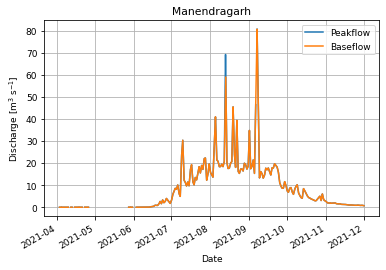

In [11]:
fig, ax = plt.subplots()
lines = plt.plot(df.index, df['Peakflow [m^3 s^-1]'] +  df['Baseflow [m^3 s^-1]'], df.index, df['Baseflow [m^3 s^-1]'])
plt.xlabel('Date')
plt.ylabel('Discharge [m$^3$ s$^{-1}$]')
plt.grid(True)
plt.title('Manendragarh') 
plt.legend(['Peakflow', 'Baseflow'])
fig.autofmt_xdate()
plt.savefig('peakflow_baseflow.png', dpi=800)

# Thank You